# **IMPLEMENTING TECHNIQUES LEARNT IN MACHINE LEARNING**

**EXPLORATORY DATA ANALYSIS ON DATASET**

In [1]:
#importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train, test and dev dataset
Cn_train = pd.read_excel("/content/sample_data/tam_7_train.xlsx")
Cn_test = pd.read_excel("/content/sample_data/tam_7_test.xlsx")
Cn_dev = pd.read_excel("/content/sample_data/tam_7_dev.xlsx")

**CHECKING STRUCTURE OF THE DATASETS**

In [3]:
# basic info for train dataset
Cn_train.info()
Cn_train.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2662 non-null   object
 1   category  2662 non-null   object
dtypes: object(2)
memory usage: 41.7+ KB


,text,category
0,இந்த மாதிரி பண்ணாதிங்க இந்த பாவத்த நீங்க அனுபவ...,None-of-the-above
1,ரொம்ப கஷ்டமா இருக்க இந்த வீடியோ,None-of-the-above
2,சிரிப்பு காட்டாத பா,None-of-the-above
3,மற்றவர்களின் உணர்ச்சிகளையும் மதிப்போம்,Counter-speech
4,இவள்ங்களை துடைப்பங்கட்டையா அடிக்கனும்,Transphobic-Threatening


In [4]:
Cn_train.shape

(2662, 2)

In [5]:
Cn_train.describe()


,text,category
count,2662,2662
unique,2058,7
top,நாசமா அழிந்து போவதற்கான உச்சக்கட்ட வழி தேவன் அ...,None-of-the-above
freq,8,1634


In [6]:
Cn_dev.info()
Cn_dev.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      666 non-null    object
 1   category  666 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


,text,category
0,வீரப்பன பத்தி வீடியோ பண்ணுங்க,None-of-the-above
1,Jose Morphin சுய புணர்ச்சி அப்படினா என்ன,None-of-the-above
2,இறைவன் உங்கள் கூட இருப்பார்,Hope-Speech
3,உணர்வு வருவது ஆண் நண்பர்களுடன் பழகும் போது அல்...,Counter-speech
4,ரொம்ப நல்லவபோல நடிக்கறாள் பேசுகிறாள் காசுகொடுக...,Transphobic-derogation


In [7]:
Cn_dev.shape

(666, 2)

In [ ]:
Cn_dev.describe()

,text,category
count,666,666
unique,632,7
top,அட இந்தவிளம்பரம் முடிந்தது,None-of-the-above
freq,2,395


In [8]:
Cn_test.info()
Cn_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      833 non-null    object
 1   category  833 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


,text,category
0,ஆமா அண்ணா சரியா சொன்னீங்க govarnmend வேலை குடு...,None-of-the-above
1,இப்படி இருந்தால் அரவானியை யாரும் ஆதரவு செய்ய ம...,Transphobic-Threatening
2,அய்யா சாமி தமிழ கொல்லாதீங்க தமிழில் 12 உயிரெழ...,None-of-the-above
3,ஏண்டா நாயே ஒரு போற பொண்ணு மடக்கி வைத்து பிளாக்...,None-of-the-above
4,அறிவு இருக்குற எவனும் இப்படி ப்ரான்க் பண்ண மாட...,None-of-the-above


In [9]:
Cn_test.shape

(833, 2)

In [10]:
Cn_test.describe()

,text,category
count,833,833
unique,764,7
top,கண்கள் கலங்கி விட்டது,None-of-the-above
freq,3,505


**HANDLING MISSING AND DUPLICATE VALUES**

In [19]:
Cn_train.isnull().sum()

,0
text,0
category,0


In [20]:
Cn_train_ndup = Cn_train.drop_duplicates()
Cn_train_ndup.to_excel("Cn_train_ndup.xlsx", index=False)

In [21]:
Cn_dev.isnull().sum()

,0
text,0
category,0


In [22]:
Cn_dev_ndup = Cn_dev.drop_duplicates()
Cn_dev_ndup.to_excel("Cn_dev_ndup.xlsx", index=False)

In [23]:
Cn_test.isnull().sum()

,0
text,0
category,0


In [24]:
Cn_test_ndup = Cn_test.drop_duplicates()
Cn_test_ndup.to_excel("Cn_test_ndup.xlsx", index=False)

In [25]:
Cn_train.nunique()


,0
text,2058
category,7


In [26]:
Cn_test.nunique()

,0
text,764
category,7


In [27]:
Cn_dev.nunique()

,0
text,632
category,7


**CATEGORY DISTRIBUTION**

In [38]:
#Train dataset
Cn_train_ndup.value_counts("category")

,count
category,
None-of-the-above,1250
Homophobic-derogation,323
Hope-Speech,172
Counter-speech,171
Transphobic-derogation,88
Homophobic-Threatening,28
Transphobic-Threatening,28


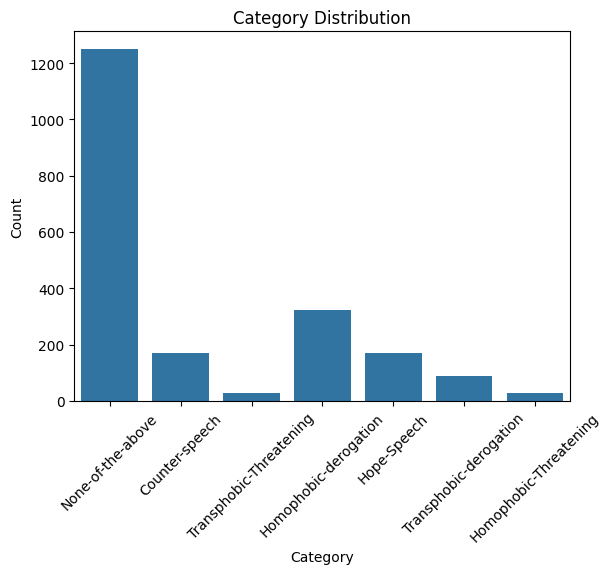

In [39]:
sns.countplot(x='category', data=Cn_train_ndup)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


In [40]:
#Test dataset
Cn_test_ndup.value_counts("category")

,count
category,
None-of-the-above,468
Homophobic-derogation,123
Counter-speech,60
Hope-Speech,60
Transphobic-derogation,26
Transphobic-Threatening,16
Homophobic-Threatening,12


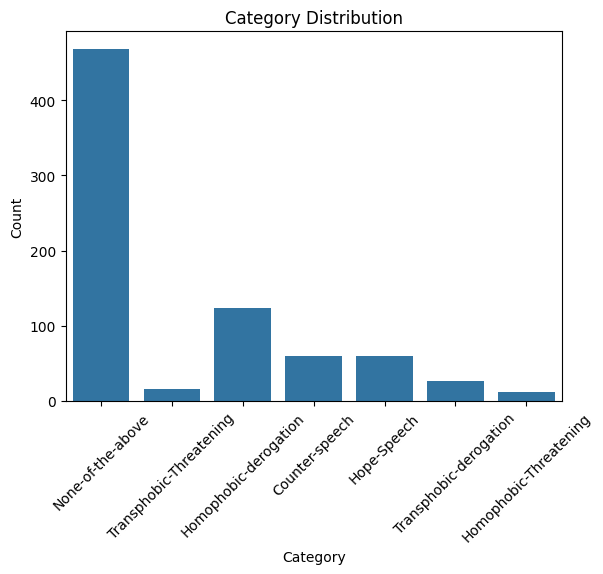

In [41]:
#Test dataset
sns.countplot(x='category', data=Cn_test_ndup)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


In [42]:
##Dev dataset
Cn_dev_ndup.value_counts("category")

,count
category,
None-of-the-above,377
Homophobic-derogation,98
Counter-speech,58
Hope-Speech,50
Transphobic-derogation,29
Homophobic-Threatening,10
Transphobic-Threatening,10


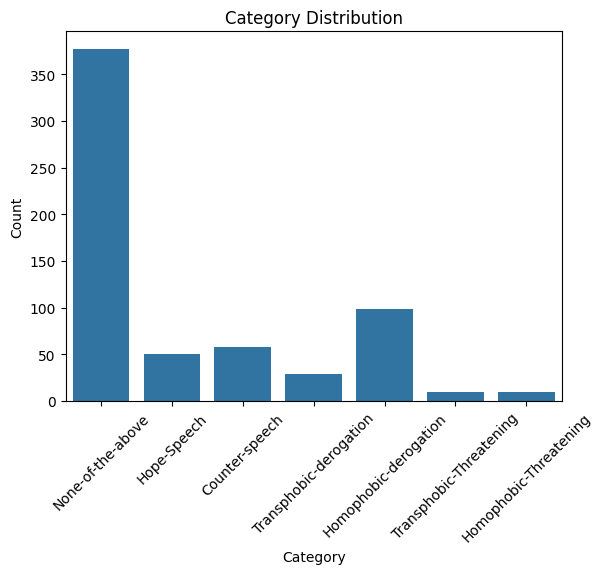

In [34]:

sns.countplot(x='category', data=Cn_dev_ndup)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


In [66]:
!apt-get -y install fonts-noto


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto is already the newest version (20201225-1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [67]:
plt.rcParams['font.family'] = 'Noto Sans Tamil'

In [63]:
from google.colab import files
uploaded = files.upload()


Saving NotoSansTamil-Regular.ttf to NotoSansTamil-Regular.ttf


In [74]:
import matplotlib.font_manager as fm

# List all font names detected by matplotlib
font_list = sorted(set(f.name for f in fm.fontManager.ttflist))
for font in font_list:
    if "Tamil" in font or "Noto" in font:
        print(font)


In [73]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans Tamil'  # Replace with the exact name
